In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
import math
import json

In [2]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [3]:
import sys
def printProgress (iteration, total, prefix = '', suffix = '', decimals = 1, barLength = 100):
    formatStr = "{0:." + str(decimals) + "f}"
    percent = formatStr.format(100 * (iteration / float(total)))
    filledLength = int(round(barLength * iteration / float(total)))
    bar = '#' * filledLength + '-' * (barLength - filledLength)
    sys.stdout.write('\r%s |%s| %s%s %s' % (prefix, bar, percent, '%', suffix)),
    if iteration == total :
        sys.stdout.write('\n')
    sys.stdout.flush()

# Musivisor

## 0. Data Preprocessing

전처리가 완료된 train data를 불러와보자.

In [4]:
os.getcwd()

'C:\\Users\\kswoo\\Desktop\\recommender_system\\rec_project'

In [4]:
data = pd.read_csv('train_data.csv').iloc[:,1:]
vector_1 = pd.DataFrame({'values' : np.repeat(1, 5285871)})
train = pd.concat([data.iloc[:, :2], vector_1], axis = 1)
train

,user_id,music_id,values
0,61281,525514,1
1,61281,129701,1
2,61281,383374,1
3,61281,562083,1
4,61281,297861,1
...,...,...,...
5285866,100389,111365,1
5285867,100389,51373,1
5285868,100389,640239,1
5285869,100389,13759,1


In [6]:
print('Total Data Shape : ', data.shape)
data.head(10)

Total Data Shape :  (5285871, 5)


,user_id,music_id,playlist_title,likes,update_dates
0,61281,525514,여행같은 음악,71,2013-12-19 18:36:19.000
1,61281,129701,여행같은 음악,71,2013-12-19 18:36:19.000
2,61281,383374,여행같은 음악,71,2013-12-19 18:36:19.000
3,61281,562083,여행같은 음악,71,2013-12-19 18:36:19.000
4,61281,297861,여행같은 음악,71,2013-12-19 18:36:19.000
5,61281,139541,여행같은 음악,71,2013-12-19 18:36:19.000
6,61281,351214,여행같은 음악,71,2013-12-19 18:36:19.000
7,61281,650298,여행같은 음악,71,2013-12-19 18:36:19.000
8,61281,531057,여행같은 음악,71,2013-12-19 18:36:19.000
9,61281,205238,여행같은 음악,71,2013-12-19 18:36:19.000


태그정보는 학습 자체에 불필요하므로 잠시 떼어내고,   
뒤에 Rating을 1로 처리하여 나중에 Pivot 처리할 때 편리하게 만들어주자

In [9]:
len(set(train.music_id))

615142

,user_id,music_id,playlist_title,likes,update_dates
180,69252,418694,2017 Pop Trend,435,2017-09-15 15:59:26.000
181,69252,222305,2017 Pop Trend,435,2017-09-15 15:59:26.000
182,69252,96545,2017 Pop Trend,435,2017-09-15 15:59:26.000
183,69252,135950,2017 Pop Trend,435,2017-09-15 15:59:26.000
184,69252,304687,2017 Pop Trend,435,2017-09-15 15:59:26.000
...,...,...,...,...,...
5285510,2531,172448,J pop처음 듣는 사람도 중독된 듯 빠져드는 j pop 리스트,344,2015-12-30 19:41:08.000
5285511,2531,11849,J pop처음 듣는 사람도 중독된 듯 빠져드는 j pop 리스트,344,2015-12-30 19:41:08.000
5285512,2531,159137,J pop처음 듣는 사람도 중독된 듯 빠져드는 j pop 리스트,344,2015-12-30 19:41:08.000
5285513,2531,111095,J pop처음 듣는 사람도 중독된 듯 빠져드는 j pop 리스트,344,2015-12-30 19:41:08.000


(array([36515., 17045., 11140.,  9328.,  4760.,  3489.,  3439.,  1895.,
         1653.,  1752.,  1153.,   887.,  1095.,   648.,   623.,   755.,
          499.,   438.,   595.,   384.,   363.,   456.,   318.,   301.,
          376.,   268.,   232.,   287.,   210.,   258.]),
 array([  0.        ,   3.33333333,   6.66666667,  10.        ,
         13.33333333,  16.66666667,  20.        ,  23.33333333,
         26.66666667,  30.        ,  33.33333333,  36.66666667,
         40.        ,  43.33333333,  46.66666667,  50.        ,
         53.33333333,  56.66666667,  60.        ,  63.33333333,
         66.66666667,  70.        ,  73.33333333,  76.66666667,
         80.        ,  83.33333333,  86.66666667,  90.        ,
         93.33333333,  96.66666667, 100.        ]),
 <BarContainer object of 30 artists>)

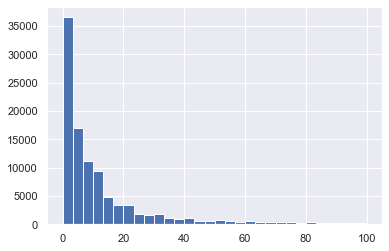

In [17]:
plt.hist(x_, bins = 30, range = (0,100))

아래 코드에 80과 10이 전처리 조건  
music_drop_list에 들어가는 변수는 버려지는 음악의 리스트로, 플레이리스트에 80 이하로 언급된 경우의 수이다.(너무 비대중적이라고 판단.)  
user_drop_list에 들어가는 변수는 버려지는 플레이리스트로, 10곡보다 적은 곡이 수록되어 있는 경우 유사성을 판단하기 쉽지 않으므로 제거했음.

In [5]:
new = train.copy()
step_1 = new.groupby(by = 'music_id' ,as_index = False).count()
music_drop_list = step_1[step_1.user_id <= 30].music_id.unique()
print('The Music to be dropped : {}'.format(music_drop_list.shape[0]))
new = new[~new['music_id'].isin(music_drop_list)]

step_2 = new.groupby(by = 'user_id' ,as_index = False).count()
user_drop_list = step_2[step_2.music_id <= 10].user_id.unique()
print('The User to be dropped : {}'.format(user_drop_list.shape[0]))
new = new[~new['user_id'].isin(user_drop_list)]
print('The Number of Music that will be trained is {}'.format(len(new.music_id.unique())))
print('The Number of User that will be trained is {}'.format(len(new.user_id.unique())))

The Music to be dropped : 585846
The User to be dropped : 32799
The Number of Music that will be trained is 29293
The Number of User that will be trained is 74627


In [65]:
k = np.sort(new.music_id.unique())

array([    10,     30,     54, ..., 707913, 707927, 707965], dtype=int64)

이제 trainset은 new에 할당되어있음

In [29]:
np.sort(new.user_id.unique())

array([     2,      4,      5, ..., 153426, 153427, 153428], dtype=int64)

In [6]:
list_1 = np.sort(new.user_id.unique())[:25000]
list_2 = np.sort(new.user_id.unique())[25000:50000]
list_3 = np.sort(new.user_id.unique())[50000:]
index_list = [list_1, list_2, list_3]

In [20]:
list_1 = new.user_id.unique()[:10000]
list_2 = new.user_id.unique()[10000:20000]
list_3 = new.user_id.unique()[20000:30000]
list_4 = new.user_id.unique()[30000:40000]
list_5 = new.user_id.unique()[40000:50000]
list_6 = new.user_id.unique()[50000:60000]
list_7 = new.user_id.unique()[60000:70000]
list_8 = new.user_id.unique()[70000:80000]
list_9 = new.user_id.unique()[80000:90000]
list_10 = new.user_id.unique()[90000:]

In [7]:
new_1 = new[new['user_id'].isin(index_list[0])]
u = pd.DataFrame([], columns = np.sort(new.music_id.unique()))

U_1 = pd.concat([u, pd.pivot_table(data = new_1, columns = 'music_id', 
              index = 'user_id', 
              values = 'values')], axis = 0).fillna(0).astype('b')

In [8]:
new_2 = new[new['user_id'].isin(index_list[1])]
u = pd.DataFrame([], columns = np.sort(new.music_id.unique()))
U_2 = pd.concat([u, pd.pivot_table(data = new_2, columns = 'music_id', 
              index = 'user_id', 
              values = 'values')], axis = 0).fillna(0).astype('b')

In [9]:
new_3 = new[new['user_id'].isin(index_list[2])]
u = pd.DataFrame([], columns = np.sort(new.music_id.unique()))
U_3 = pd.concat([u, pd.pivot_table(data = new_3, columns = 'music_id', 
              index = 'user_id', 
              values = 'values')], axis = 0).fillna(0).astype('b')

In [10]:
U_all = pd.concat([U_1, U_2, U_3], axis = 0)

In [11]:
U_ = U_all.values 

In [12]:
u1 = U_[:,:9500]
u2 = U_[:,9500:19000]
u3 = U_[:,19000:]

In [21]:
u_1 = u1.astype(float32).transpose().dot(u1.astype(float32))

NameError: name 'float32' is not defined

In [31]:
np.save('u_the_7_3', U_)
np.save('u_the_music', U_all.columns)
np.save('u_the_user', U_all.index )

In [28]:
np.save('Utility_mat', U_all.values)
np.save('Utility_items_id', U_all.columns)
np.save('Utility_user_id', U_all.index)

In [17]:
U_all = pd.DataFrame([])
for i in range(3) : 
    print('Now in Process {}'.format(i))
    new_1 = new[new['user_id'].isin(index_list[0])]
    U = pd.pivot_table(data = new_1, columns = 'music_id', 
              index = 'user_id', 
              values = 'values')
    U = U.astype(int)
    U_all = pd.concat([U_all, U], axis = 0)

music_id,10,30,54,62,67,71,93,96,111,148,...,707768,707786,707788,707792,707837,707841,707873,707913,707927,707965
user_id,,,,,,,,,,,,,,,,,,,,,
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
np.save('U_1.npy',U.values)

In [22]:
np.save('U_1_music_id.npy',U.columns)
np.save('U_1_user_id.npy',U.index)

In [35]:
the_new = U.values

In [38]:
np.save('U_1.npy',the_new)

In [15]:
U_all

music_id,30,54,62,67,71,96,195,210,224,238,...,707659,707724,707763,707768,707786,707792,707837,707841,707873,707913
user_id,,,,,,,,,,,,,,,,,,,,,
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153412,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
